In [19]:
%pip install pandas matplotlib scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.6 MB 12.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.6 MB 28.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.3/10.6 MB 30.3 MB/s eta 0:00:01
   ------------------ --------------------- 4.8/10.6 MB 27.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.4/10.6 MB 29.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.6/10.6 MB 32.5 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 34.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   --------------------------------------- 301.2/301.2 kB 19.4 MB/s eta 0:00:00
 

In [12]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('./transactions.csv')

# Print the first few rows
print(df.head())

         Date          Description   Amount Transaction Type  \
0  01/01/2018               Amazon    11.11            debit   
1  01/02/2018     Mortgage Payment  1247.44            debit   
2  01/02/2018      Thai Restaurant    24.22            debit   
3  01/03/2018  Credit Card Payment  2298.09           credit   
4  01/04/2018              Netflix    11.76            debit   

              Category   Account Name  
0             Shopping  Platinum Card  
1      Mortgage & Rent       Checking  
2          Restaurants    Silver Card  
3  Credit Card Payment  Platinum Card  
4        Movies & DVDs  Platinum Card  


In [13]:
df.describe(include='all')

,Date,Description,Amount,Transaction Type,Category,Account Name
count,806,806,806.000000,806,806,806
unique,432,65,NaN,2,22,3
top,12/18/2018,Credit Card Payment,NaN,debit,Credit Card Payment,Platinum Card
freq,7,143,NaN,688,143,366
mean,NaN,NaN,273.391489,NaN,NaN,NaN
std,NaN,NaN,667.630374,NaN,NaN,NaN
min,NaN,NaN,1.750000,NaN,NaN,NaN
25%,NaN,NaN,15.687500,NaN,NaN,NaN
50%,NaN,NaN,37.480000,NaN,NaN,NaN
75%,NaN,NaN,117.680000,NaN,NaN,NaN


<Axes: xlabel='Category'>

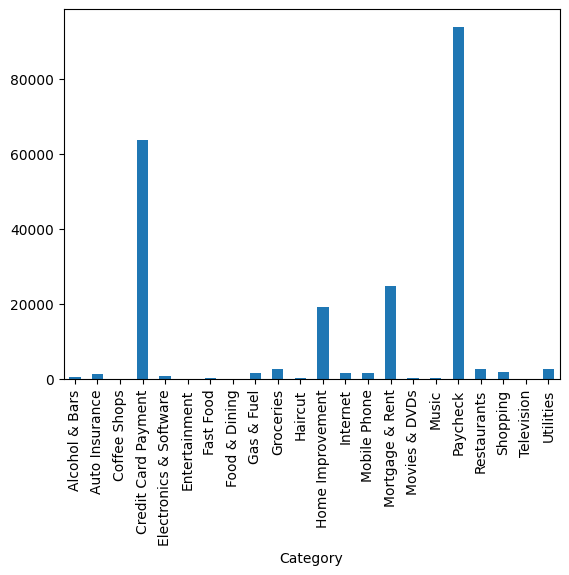

In [16]:
df.groupby('Category')['Amount'].sum().plot(kind='bar')


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data based on date range
start_date = '2018-01-01'
end_date = '2019-12-31'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[mask]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category'])
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

# Define target and features
X = df[['Category']]
y = df['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)







[  10.68536009   21.78386619   20.83533136   43.45099946   43.45099946
   10.68536009 2037.50002869   43.45099946   28.2244863    33.58240705
 2037.50002869 2037.50002869   34.44606248   30.76423372   33.58240705
   10.68536009   43.45099946   30.76423372 1167.13282753   33.58240705
    3.55246384   10.68536009   30.76423372    3.55246384   75.06195174
    3.55246384   75.06195174   10.68536009   20.83533136  451.2405915
   43.45099946   75.00561558   75.06195174   30.76423372   30.76423372
 1167.13282753   81.15999571   43.45099946    3.55246384   28.2244863
  451.2405915    30.76423372   43.45099946 1167.13282753   30.76423372
   30.76423372   43.45099946   28.2244863    28.2244863    13.0438754
  232.53823134   34.44606248   30.76423372  451.2405915    33.58240705
  451.2405915   451.2405915     3.55246384   33.58240705  629.95506031
  629.95506031  451.2405915    30.76423372   30.76423372   28.2244863
  451.2405915    75.00561558   28.2244863    75.06195174   11.14977748
   34.4460